In [ ]:
from google.colab import files
uploaded = files.upload()
## use this to upload the file EOP_20_C04_one_file_1962-now.txt available on Moodle

In [2]:
"""
Follow the examples of using FFT from:
https://pythonnumericalmethods.studentorg.berkeley.edu/notebooks/chapter24.04-FFT-in-Python.html

"""

'\nFollow the examples of using FFT from:\nhttps://pythonnumericalmethods.studentorg.berkeley.edu/notebooks/chapter24.04-FFT-in-Python.html\n\n'

In [ ]:
"""
Perform FFT for the SSN data from last class; identify the main periodic components
"""

In [4]:
"""
Perform the FFT for the LOD data and try to identify the main
periodic components.
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file = 'EOP_20_C04_one_file_1962-now.txt'

##
names = ['YR','MM','DD', 'HH', 'MJD','x(")','y(")', 'UT1-UTC(s)',
         'dX(")', 'dY(")', 'xrt(")', 'yrt(")', 'LOD(s)', 'x Er', 'y Er',
         'UT1-UTC Er', 'dX Er', 'dY Er', 'xrt Er', 'yrt Er', 'LOD Er']
         
df = pd.read_csv(file,sep='\s+',skiprows=6,names=names)

In [5]:
df

,YR,MM,DD,HH,MJD,"x("")","y("")",UT1-UTC(s),"dX("")","dY("")",...,"yrt("")",LOD(s),x Er,y Er,UT1-UTC Er,dX Er,dY Er,xrt Er,yrt Er,LOD Er
0,1962,1,1,0,37665.0,-0.012700,0.213000,0.032634,0.000000,0.000000,...,0.000000,0.001723,0.030000,0.030000,0.002000,0.004774,0.002000,0.000000,0.000000,0.001400
1,1962,1,2,0,37666.0,-0.015900,0.214100,0.032055,0.000000,0.000000,...,0.000000,0.001669,0.030000,0.030000,0.002000,0.004774,0.002000,0.000000,0.000000,0.001400
2,1962,1,3,0,37667.0,-0.019000,0.215200,0.031553,0.000000,0.000000,...,0.000000,0.001582,0.030000,0.030000,0.002000,0.004774,0.002000,0.000000,0.000000,0.001400
3,1962,1,4,0,37668.0,-0.021999,0.216301,0.031144,0.000000,0.000000,...,0.000000,0.001496,0.030000,0.030000,0.002000,0.004774,0.002000,0.000000,0.000000,0.001400
4,1962,1,5,0,37669.0,-0.024799,0.217301,0.030815,0.000000,0.000000,...,0.000000,0.001416,0.030000,0.030000,0.002000,0.004774,0.002000,0.000000,0.000000,0.001400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22731,2024,3,27,0,60396.0,-0.011460,0.330102,-0.013189,0.000365,-0.000016,...,0.002659,0.000680,0.000053,0.000045,0.000015,0.000043,0.000040,0.000065,0.000075,0.000026
22732,2024,3,28,0,60397.0,-0.012222,0.332871,-0.013777,0.000335,-0.000088,...,0.002627,0.000500,0.000053,0.000046,0.000014,0.000041,0.000036,0.000064,0.000098,0.000026
22733,2024,3,29,0,60398.0,-0.012670,0.335116,-0.014182,0.000321,-0.000134,...,0.002037,0.000310,0.000051,0.000045,0.000013,0.000041,0.000035,0.000062,0.000085,0.000025
22734,2024,3,30,0,60399.0,-0.012674,0.336972,-0.014403,0.000324,-0.000154,...,0.001835,0.000121,0.000051,0.000045,0.000013,0.000042,0.000035,0.000061,0.000079,0.000024


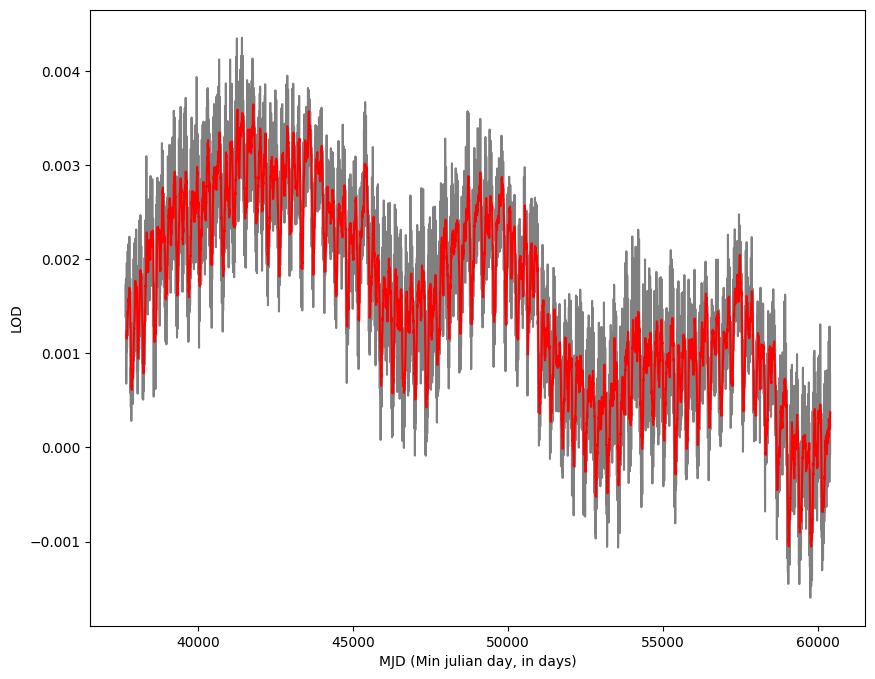

In [8]:
# y = LOD 
# x = x(")


x = df["MJD"]
y = df['LOD(s)']
y_mean = y.rolling(window=30).mean()

plt.figure(figsize = (10, 8))
plt.plot(x, y, 'gray')
plt.plot(x, y_mean, 'r')

plt.ylabel('LOD')
plt.xlabel('MJD (Min julian day, in days)')

plt.show()

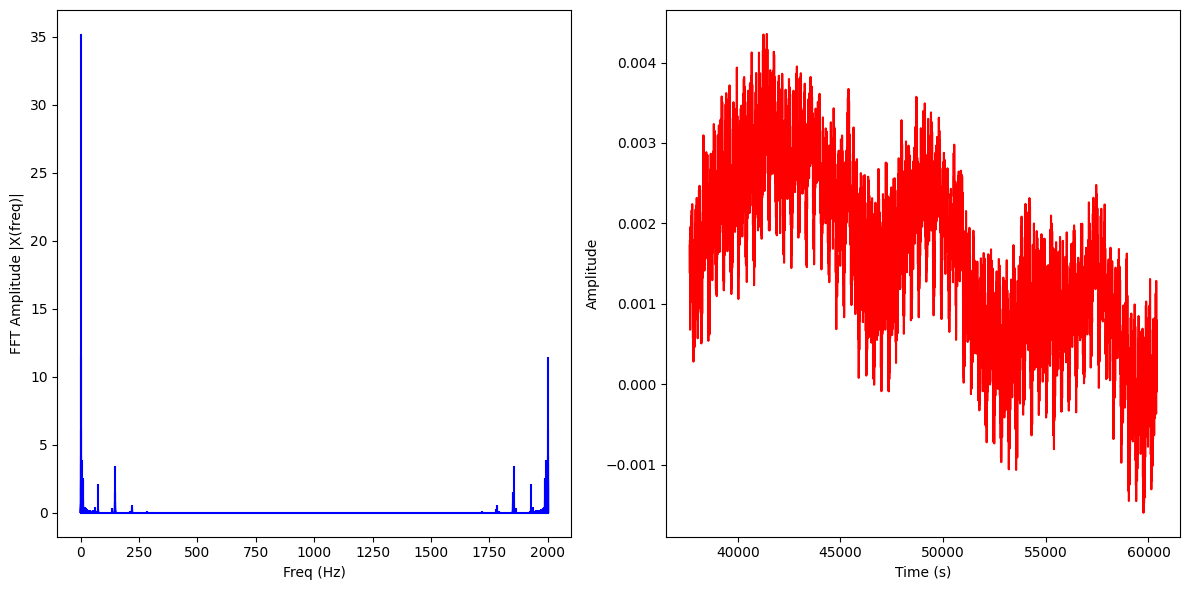

In [10]:
from numpy.fft import fft, ifft

# sampling rate
sr = 2000

X = fft(y)
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')

plt.subplot(122)
plt.plot(x, ifft(X), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()